In [3]:
# ============================================================
# 📦 IMPORT LIBRARY DAN LOAD DATASET
# ============================================================

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Konfigurasi visual
plt.style.use("seaborn-v0_8-muted")

# === Load dataset utama ===
df = pd.read_csv("../Data/cleaned_gojek_text_final.csv")

# Pastikan kolom yang dibutuhkan ada
required_cols = ['tanggal', 'stemmed_text', 'tag']
for col in required_cols:
    if col not in df.columns:
        raise KeyError(f"Kolom '{col}' tidak ditemukan di dataset!")

# 🔹 Ubah kolom tanggal ke format datetime
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')


print(f"✅ Dataset berhasil dimuat: {len(df)} baris")
df.head(3)


✅ Dataset berhasil dimuat: 158 baris


,article_text,tanggal,cleaned_text,tokens,stemmed_tokens,stemmed_text,polarity,sentiment,tag
0,Yogyakarta (beritajatim.com)– Pemerintah melal...,2025-02-07,yogyakarta beritajatim com pemerintah melalui ...,"['yogyakarta', 'pemerintah', 'kementerian', 'p...","['yogyakarta', 'perintah', 'menteri', 'hubung'...",yogyakarta perintah menteri hubung bijak naik ...,0.000000,neutral,Local News
1,"Beritanusantara.co, Jakarta – Rencana pemerint...",2025-04-07,beritanusantara co jakarta rencana pemerintah ...,"['rencana', 'pemerintah', 'menaikkan', 'tarif'...","['rencana', 'perintah', 'naik', 'tarif', 'dasa...",rencana perintah naik tarif dasar ojek online ...,0.025484,neutral,Economic
2,"Penelitian Menyebutkan, 75% Pengguna Ojol Tola...",2025-02-03,penelitian menyebutkan pengguna ojol tolak ken...,"['penelitian', 'pengguna', 'ojol', 'tolak', 'k...","['teliti', 'guna', 'ojol', 'tolak', 'naik', 't...",teliti guna ojol tolak naik tarif ilustrasi tu...,0.135888,positive,Academic


Top Words TF-IDF (Time Frame)

🗓️ Contoh hasil transformasi waktu:
     tanggal    Month Quarter
0 2025-02-07  2025-02  2025Q1
1 2025-04-07  2025-04  2025Q2
2 2025-02-03  2025-02  2025Q1
3 2025-02-07  2025-02  2025Q1
4 2025-01-07  2025-01  2025Q1

===== 🔸 Top 10 TF-IDF Words untuk 2018Q2 =====
            term     tfidf
0         tampil  0.284440
1       aplikasi  0.227552
2           guna  0.227552
3         jemput  0.227552
4  lokasi jemput  0.170664
5           baru  0.170664
6        layanan  0.170664
7         lokasi  0.170664
8           ride  0.170664
9         driver  0.170664


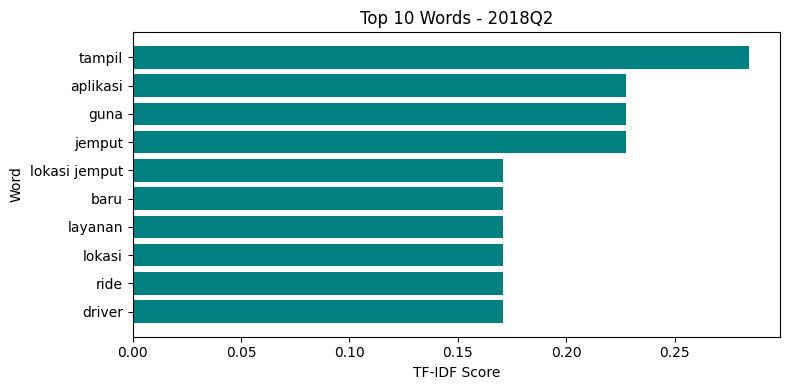


===== 🔸 Top 10 TF-IDF Words untuk 2018Q3 =====
              term     tfidf
0            tarif  0.572611
1        pengemudi  0.210962
2            mitra  0.210962
3           sesuai  0.180825
4            saing  0.150687
5  mitra pengemudi  0.150687
6        sejahtera  0.120550
7     sesuai tarif  0.120550
8            pasar  0.120550
9            promo  0.120550


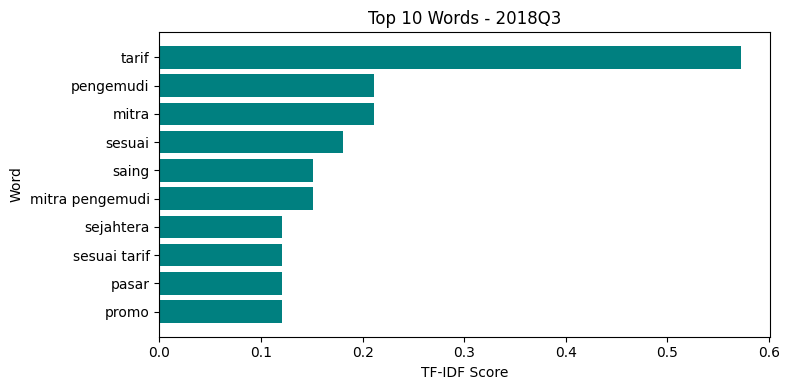


===== 🔸 Top 10 TF-IDF Words untuk 2018Q4 =====
              term     tfidf
0          hailing  0.198762
1           tariff  0.198762
2   transportation  0.198762
3             said  0.198762
4     ride hailing  0.198762
5             ride  0.198762
6  representatives  0.149071
7              app  0.149071
8         business  0.149071
9      hailing app  0.149071


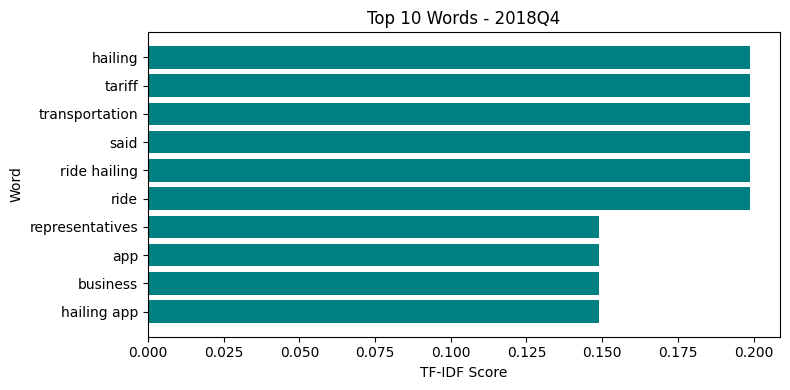


===== 🔸 Top 10 TF-IDF Words untuk 2020Q1 =====
        term     tfidf
0        pma  0.220326
1    ekonomi  0.176261
2       baca  0.176261
3  investasi  0.132196
4      tirza  0.132196
5  teknologi  0.132196
6     lanjut  0.132196
7      kerja  0.132196
8      usaha  0.132196
9  informasi  0.132196


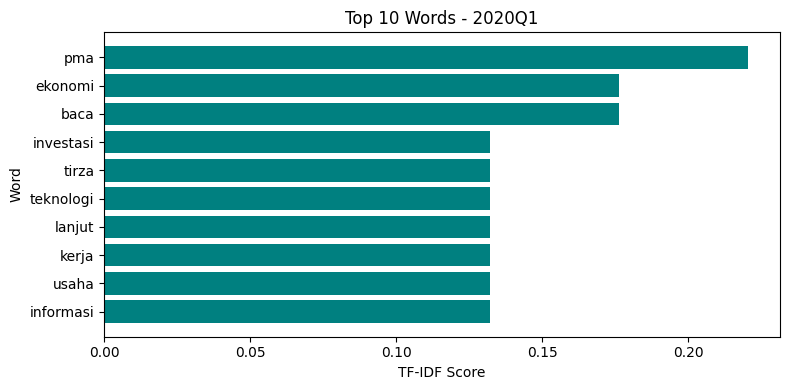


===== 🔸 Top 10 TF-IDF Words untuk 2020Q4 =====
              term     tfidf
0             goto  0.208389
1           bisnis  0.208389
2            usaha  0.173657
3             buka  0.173657
4             baca  0.173657
5          persero  0.173657
6        informasi  0.173657
7            tirza  0.173657
8  koesoemohadiani  0.138926
9            tawar  0.138926


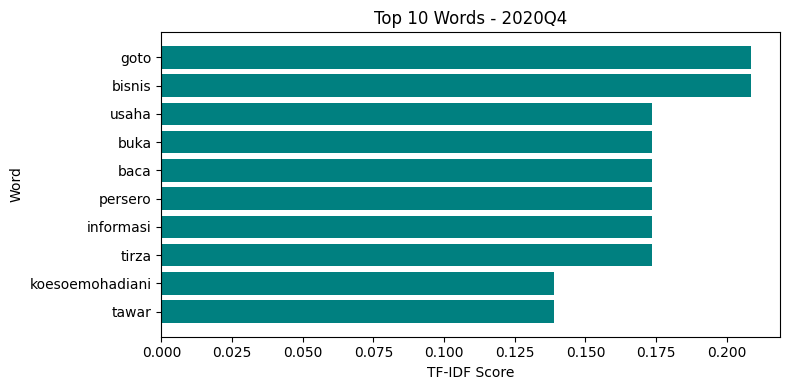


===== 🔸 Top 10 TF-IDF Words untuk 2021Q1 =====
              term     tfidf
0            temen  0.239474
1         paylater  0.239474
2   bayar paylater  0.179605
3             liat  0.179605
4         aplikasi  0.179605
5             cari  0.179605
6            bayar  0.179605
7           tombol  0.119737
8            tutup  0.119737
9  transaksi temen  0.119737


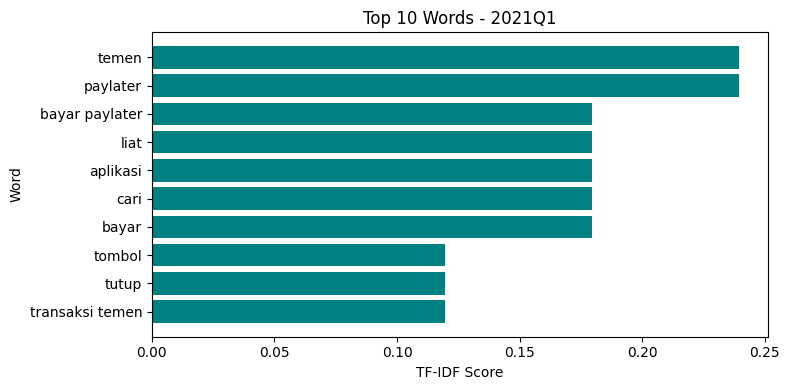


===== 🔸 Top 10 TF-IDF Words untuk 2021Q4 =====
            term     tfidf
0          kerja  0.201381
1      pengemudi  0.185060
2           ojol  0.180320
3         komisi  0.151748
4          mitra  0.147403
5         potong  0.144574
6         persen  0.144268
7  potong komisi  0.109968
8            ade  0.094279
9           baca  0.086481


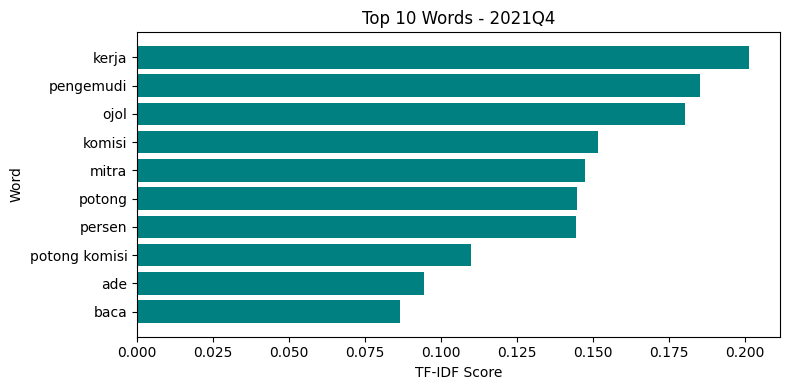


===== 🔸 Top 10 TF-IDF Words untuk 2022Q1 =====
          term     tfidf
0       online  0.356600
1         ojek  0.356600
2  ojek online  0.329169
3       potong  0.246877
4        turun  0.192015
5        usaha  0.192015
6      profesi  0.164584
7        kerja  0.137154
8         ojol  0.137154
9     aplikasi  0.137154


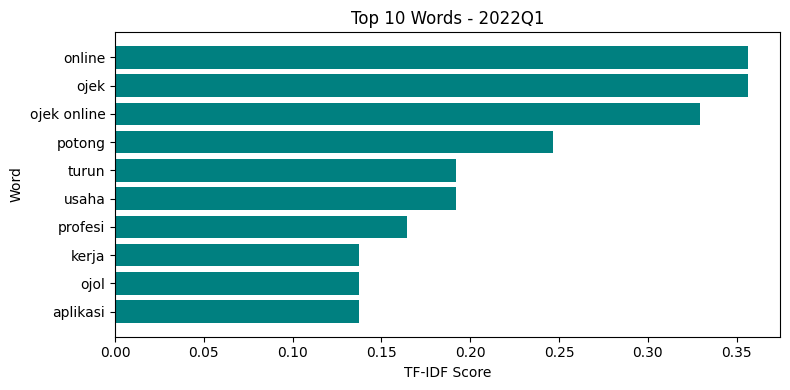


===== 🔸 Top 10 TF-IDF Words untuk 2022Q4 =====
         term     tfidf
0        naik  0.467768
1        ojol  0.340195
2       tarif  0.297670
3  naik tarif  0.212622
4      driver  0.170097
5    kemenhub  0.127573
6      dampak  0.127573
7       priyo  0.127573
8   aplikator  0.127573
9       harga  0.085049


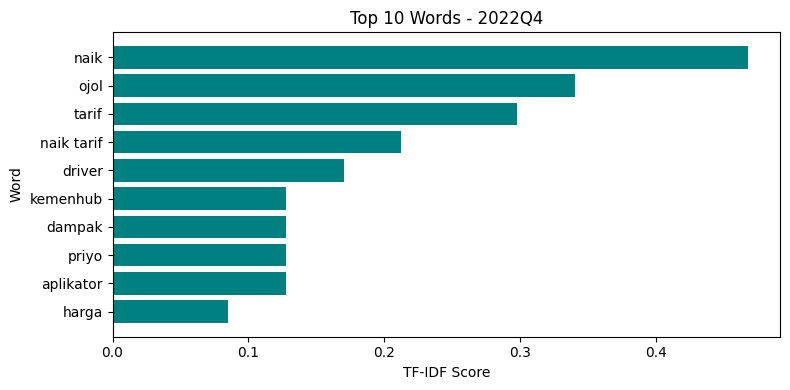


===== 🔸 Top 10 TF-IDF Words untuk 2023Q1 =====
         term     tfidf
0       fitur  0.138351
1       tarif  0.122103
2       motor  0.113490
3        naik  0.111240
4        ojol  0.101817
5         isu  0.099669
6        nego  0.077321
7     indrive  0.077321
8  naik tarif  0.076112
9       emisi  0.070931


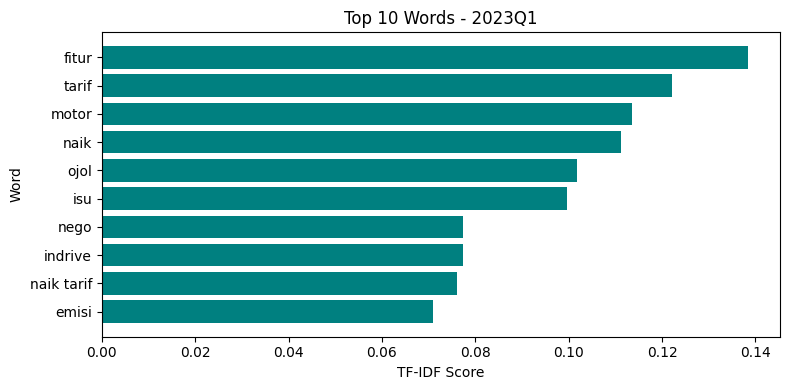


===== 🔸 Top 10 TF-IDF Words untuk 2023Q2 =====
        term     tfidf
0  perempuan  0.243353
1      kerja  0.207512
2  pengemudi  0.200707
3       laki  0.121677
4      women  0.121677
5      mitra  0.120424
6     bentuk  0.107995
7      jamin  0.100353
8     hubung  0.090318
9    lindung  0.080283


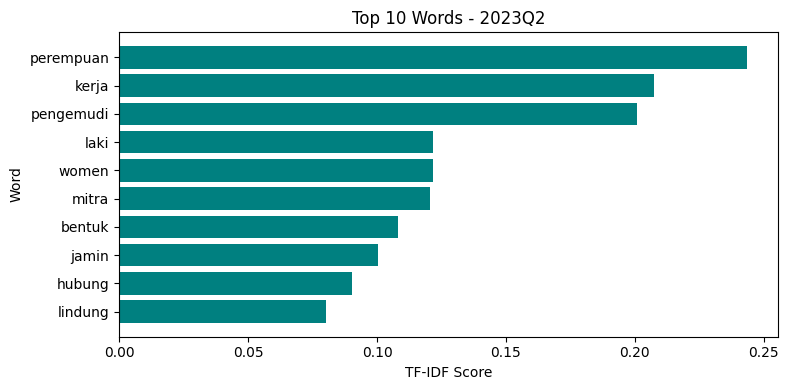


===== 🔸 Top 10 TF-IDF Words untuk 2023Q3 =====
                 term     tfidf
0               kerja  0.273557
1            direspon  0.179904
2            aspirasi  0.179904
3    persen responden  0.119936
4  responden aspirasi  0.119936
5           responden  0.119936
6              persen  0.119936
7   aspirasi direspon  0.119936
8              celaka  0.109423
9               jalan  0.109423


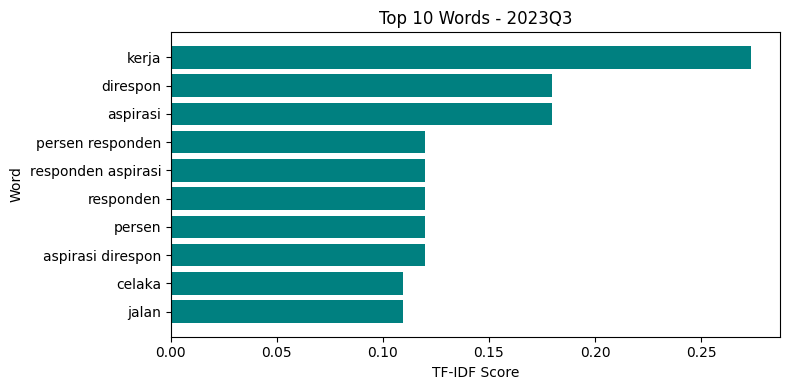


===== 🔸 Top 10 TF-IDF Words untuk 2023Q4 =====
        term     tfidf
0   aplikasi  0.152454
1       guna  0.119241
2       akun  0.110989
3      keluh  0.087679
4    layanan  0.082494
5  pelanggan  0.074832
6      kurir  0.071860
7       baca  0.064183
8       pagi  0.064065
9     driver  0.061300


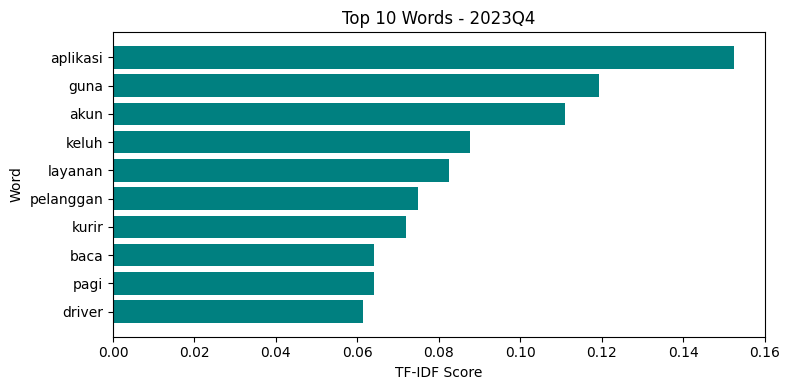


===== 🔸 Top 10 TF-IDF Words untuk 2024Q1 =====
        term     tfidf
0     persen  0.127192
1       akun  0.108016
2      keluh  0.108016
3       ojol  0.103755
4  kombinasi  0.086735
5      mitra  0.081751
6     potong  0.066887
7     komisi  0.059455
8  pengemudi  0.059455
9      makan  0.058762


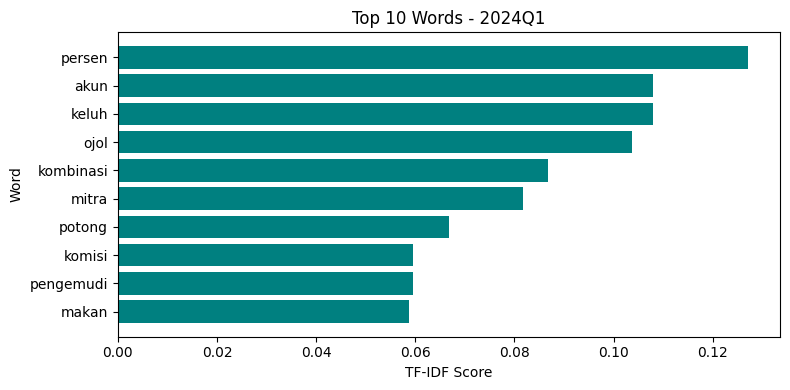


===== 🔸 Top 10 TF-IDF Words untuk 2024Q2 =====
          term     tfidf
0         ojol  0.201518
1        hukum  0.158309
2        tarif  0.156280
3       driver  0.116637
4          jam  0.111353
5  driver ojol  0.109992
6       persen  0.099574
7         ojek  0.095258
8       online  0.095258
9  ojek online  0.091261


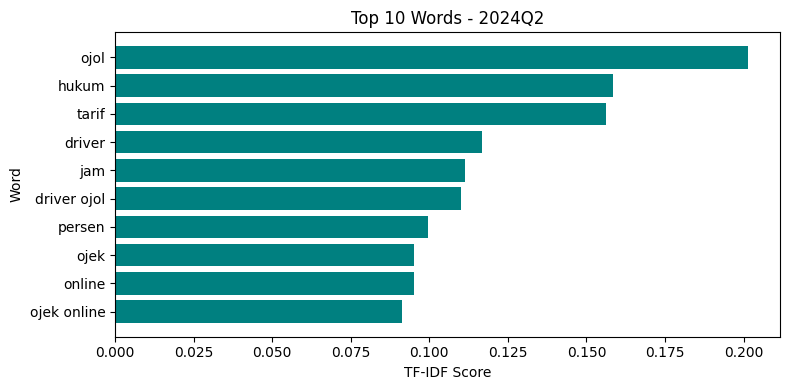


===== 🔸 Top 10 TF-IDF Words untuk 2024Q3 =====
       term     tfidf
0     error  0.112054
1      guna  0.075256
2   layanan  0.075181
3      aman  0.067537
4     gopay  0.065450
5     keluh  0.063099
6     mitra  0.061878
7  aplikasi  0.060168
8     jalan  0.059728
9      goto  0.058785


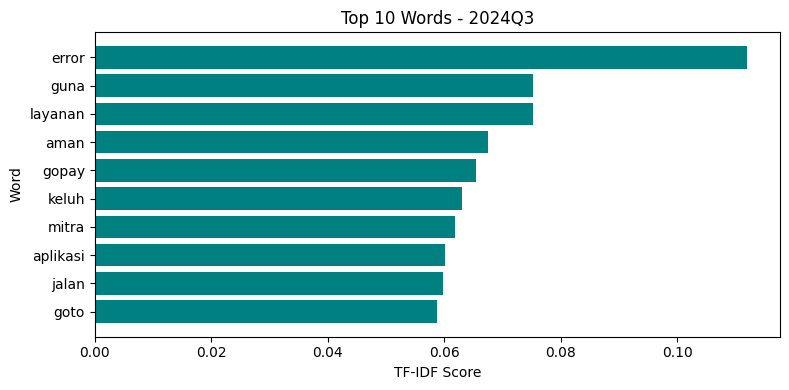


===== 🔸 Top 10 TF-IDF Words untuk 2024Q4 =====
          term     tfidf
0  ojek online  0.197762
1         ojek  0.197762
2       online  0.170774
3     koperasi  0.163855
4    pengemudi  0.139756
5        mitra  0.089320
6       undang  0.080054
7      ekonomi  0.074998
8       merger  0.072781
9         goto  0.072781


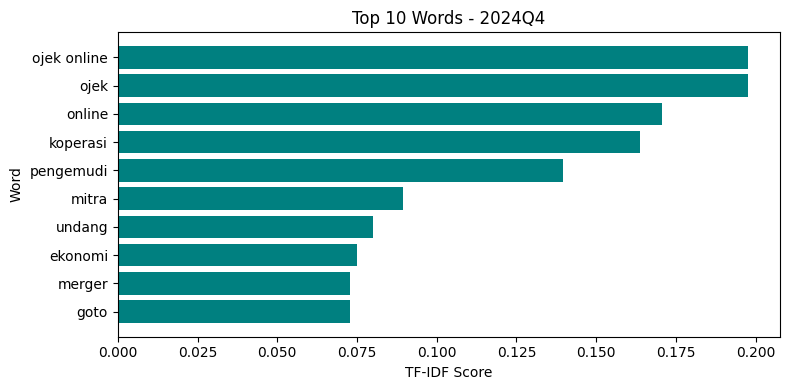


===== 🔸 Top 10 TF-IDF Words untuk 2025Q1 =====
         term     tfidf
0       tarif  0.165059
1        naik  0.107557
2        ojol  0.093952
3  naik tarif  0.091483
4   pengemudi  0.079141
5      persen  0.066109
6       mitra  0.060739
7     triliun  0.058867
8    konsumen  0.058496
9       dapat  0.058093


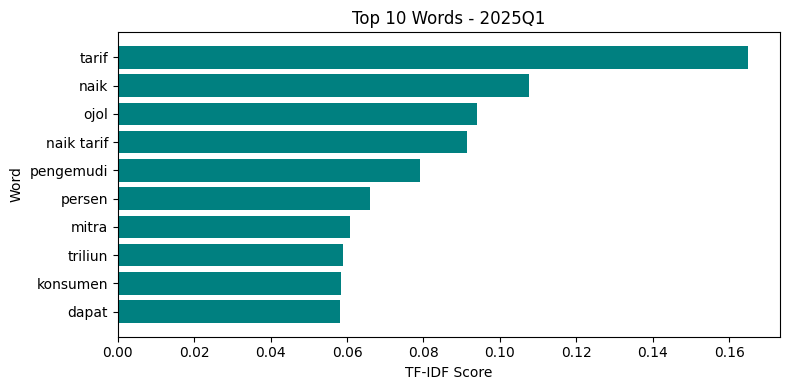


===== 🔸 Top 10 TF-IDF Words untuk 2025Q2 =====
         term     tfidf
0       tarif  0.166216
1       biaya  0.098300
2        naik  0.097013
3  naik tarif  0.078073
4        ojek  0.074059
5      persen  0.068065
6   pengemudi  0.067448
7    konsumen  0.066483
8      online  0.065488
9        ojol  0.064826


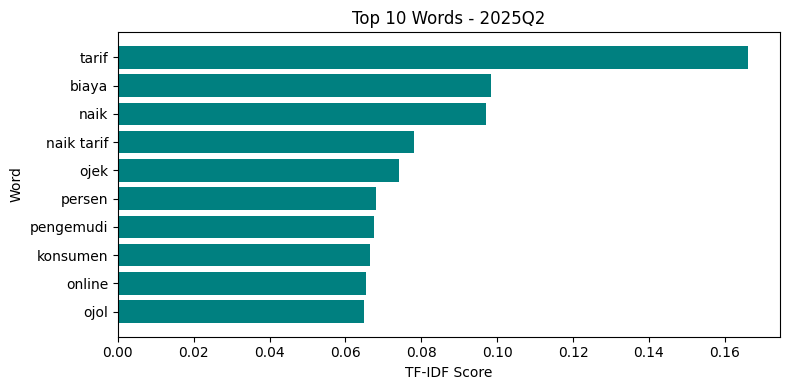


===== 🔸 Top 10 TF-IDF Words untuk 2025Q3 =====
             term     tfidf
0           biaya  0.297867
1        aplikasi  0.297867
2        konsumen  0.248222
3          driver  0.223400
4  biaya aplikasi  0.223400
5           jalan  0.198578
6            goto  0.173756
7           mitra  0.173756
8           bayar  0.148933
9           dapat  0.148933


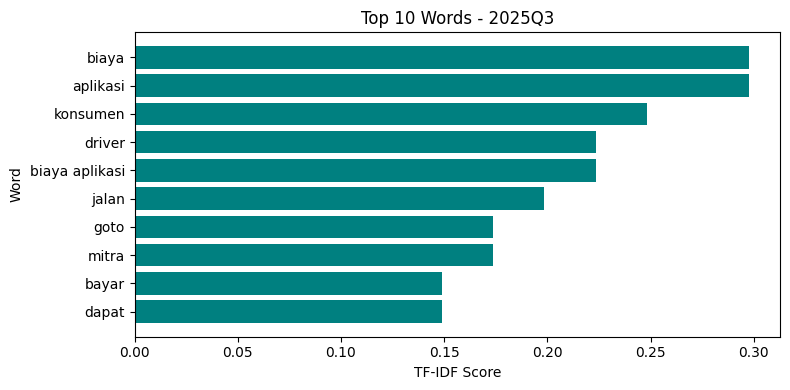


===== 🔸 Top 10 TF-IDF Words untuk 2025Q4 =====
           term     tfidf
0         mitra  0.468509
1        driver  0.319438
2  mitra driver  0.255551
3          naik  0.234255
4         tarif  0.234255
5   sosialisasi  0.191663
6    naik tarif  0.191663
7         bantu  0.170367
8       layanan  0.127775
9         paham  0.127775


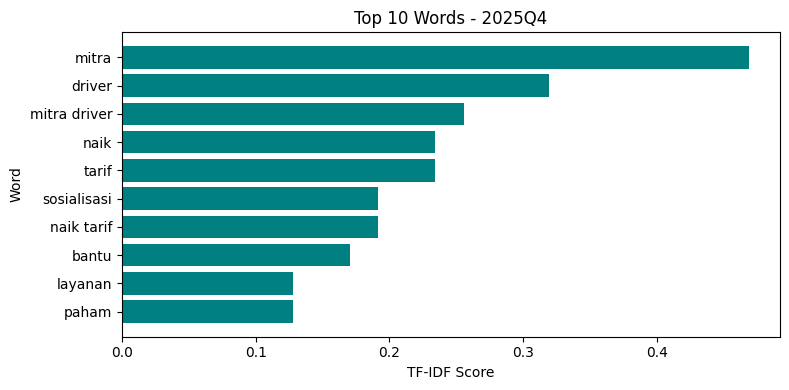

In [4]:
# ============================================================
# 🧠 TF-IDF ANALYSIS PER QUARTER
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Pastikan kolom tanggal & teks valid
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')
df = df.dropna(subset=['stemmed_text', 'tanggal']).reset_index(drop=True)

# === Tambah kolom waktu ===
df['Month'] = df['tanggal'].dt.to_period('M').astype(str)    # contoh: 2025-06
df['Quarter'] = df['tanggal'].dt.to_period('Q').astype(str)  # contoh: 2025Q2

print("🗓️ Contoh hasil transformasi waktu:")
print(df[['tanggal', 'Month', 'Quarter']].head())

# === Fungsi bantu untuk TF-IDF ===
def compute_tfidf(corpus, max_features=1000, ngram_range=(1,2)):
    """
    Hitung TF-IDF untuk kumpulan teks dan kembalikan dataframe
    dengan rata-rata skor per kata.
    """
    vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)
    tfidf_mean = tfidf_df.mean().sort_values(ascending=False)
    result = pd.DataFrame(tfidf_mean).reset_index()
    result.columns = ['term', 'tfidf']
    return result

# === TF-IDF berdasarkan Quarter ===
quarters = df['Quarter'].unique()

for q in sorted(quarters):
    subset = df[df['Quarter'] == q]
    tfidf_q = compute_tfidf(subset['stemmed_text'].astype(str))

    print(f"\n===== 🔸 Top 10 TF-IDF Words untuk {q} =====")
    print(tfidf_q.head(10))

    # === Visualisasi ===
    plt.figure(figsize=(8, 4))
    plt.barh(tfidf_q.head(10)['term'], tfidf_q.head(10)['tfidf'], color='teal')
    plt.gca().invert_yaxis()
    plt.title(f"Top 10 Words - {q}")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()


🔹 Ditemukan 6 kategori konten: ['Local News', 'Economic', 'Academic', 'Foreign News', 'Opinion', 'Politic']

===== 🟦 Top 10 TF-IDF Words untuk kategori: LOCAL NEWS =====
        term     tfidf
0   aplikasi  0.095567
1       guna  0.083695
2      mitra  0.061772
3      fitur  0.059640
4    layanan  0.057054
5      keluh  0.055969
6       akun  0.054875
7  pengemudi  0.052170
8      error  0.051293
9     driver  0.049483


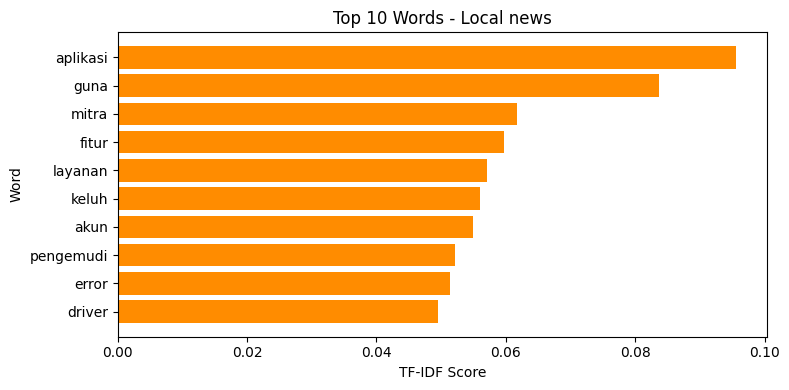


===== 🟦 Top 10 TF-IDF Words untuk kategori: ECONOMIC =====
         term     tfidf
0       tarif  0.148147
1        naik  0.104793
2        ojol  0.084128
3  naik tarif  0.083374
4       mitra  0.070197
5   pengemudi  0.069948
6      persen  0.062134
7       kerja  0.057617
8      driver  0.056156
9   aplikator  0.053270


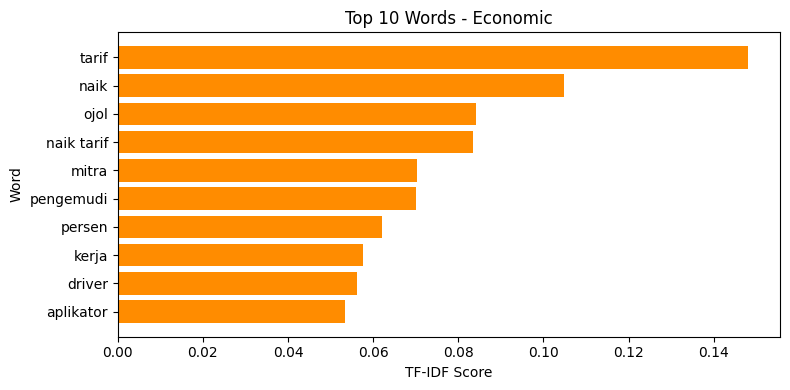


===== 🟦 Top 10 TF-IDF Words untuk kategori: ACADEMIC =====
         term     tfidf
0       tarif  0.176349
1        naik  0.110018
2        ojol  0.106152
3  naik tarif  0.087866
4      persen  0.086264
5    konsumen  0.085776
6        ojek  0.085111
7      online  0.075048
8       biaya  0.070714
9   pengemudi  0.060617


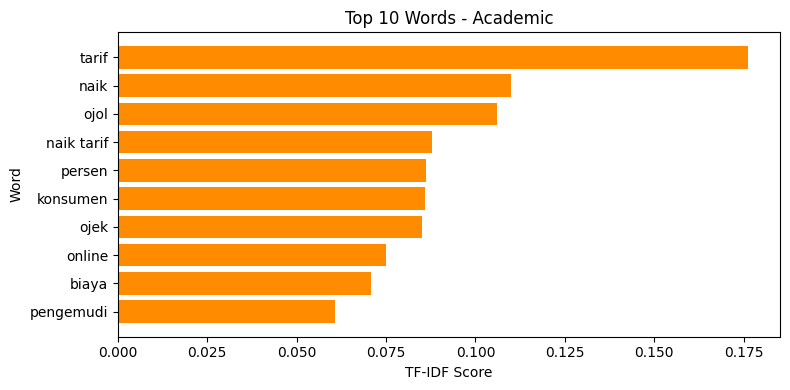


===== 🟦 Top 10 TF-IDF Words untuk kategori: OPINION =====
          term     tfidf
0       online  0.094437
1         ojek  0.092434
2  ojek online  0.089523
3        tarif  0.088067
4    pengemudi  0.066532
5         ojol  0.056341
6    perempuan  0.054326
7     aplikasi  0.051092
8        hukum  0.049799
9     warganet  0.047731


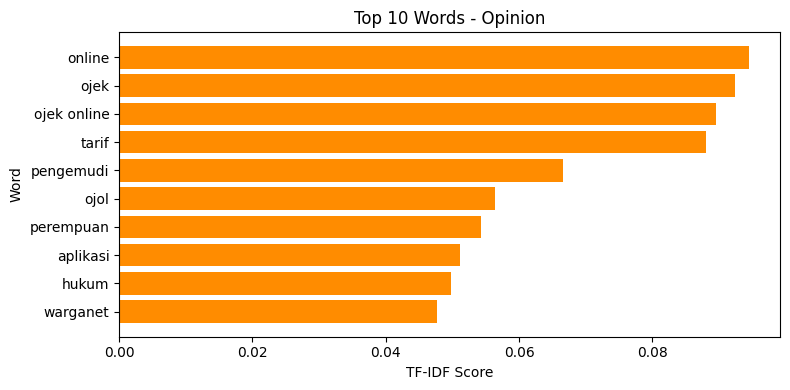


===== 🟦 Top 10 TF-IDF Words untuk kategori: POLITIC =====
            term     tfidf
0          kurir  0.127745
1         persen  0.124145
2         potong  0.122838
3           goto  0.121196
4         komisi  0.103940
5  potong komisi  0.094491
6       perintah  0.085559
7           ojol  0.080343
8      pengemudi  0.077973
9           atur  0.076394


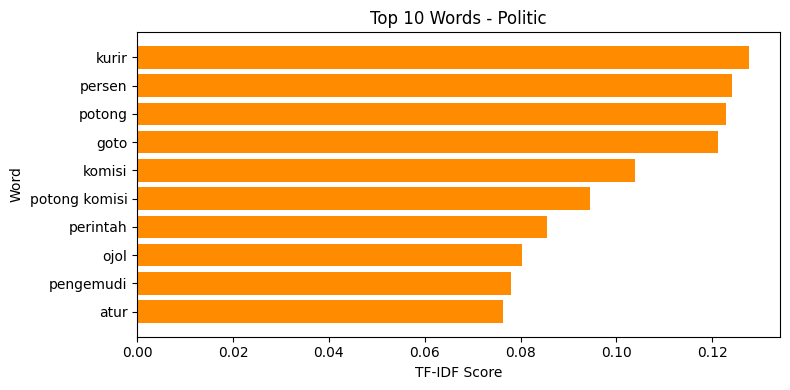

In [5]:
# ============================================================
# 🏷️ TF-IDF ANALYSIS BERDASARKAN CONTENT LABEL
# ============================================================

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

content_labels = df['tag'].dropna().unique().tolist()
print(f"🔹 Ditemukan {len(content_labels)} kategori konten:", content_labels)

for label in content_labels:
    subset = df[df['tag'] == label]
    if len(subset) < 3:
        continue  # lewati kategori dengan artikel sedikit

    tfidf_label = compute_tfidf(subset['stemmed_text'].astype(str))

    print(f"\n===== 🟦 Top 10 TF-IDF Words untuk kategori: {label.upper()} =====")
    print(tfidf_label.head(10))

    # Visualisasi
    plt.figure(figsize=(8,4))
    plt.barh(tfidf_label.head(10)['term'], tfidf_label.head(10)['tfidf'], color='darkorange')
    plt.gca().invert_yaxis()
    plt.title(f"Top 10 Words - {label.capitalize()}")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()



===== 🔸 Top 10 TF-IDF Words untuk Tahun 2018 =====
           term     tfidf
0         tarif  0.191983
1        tampil  0.099536
2          ride  0.096382
3          guna  0.083614
4        jemput  0.079629
5     pengemudi  0.070731
6         mitra  0.070731
7       layanan  0.068474
8      aplikasi  0.068244
9  ride hailing  0.067010


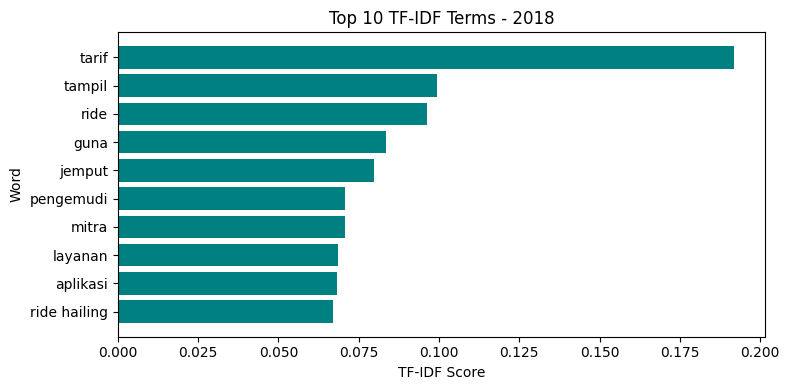


===== 🔸 Top 10 TF-IDF Words untuk Tahun 2020 =====
        term     tfidf
0       baca  0.156407
1        pma  0.146581
2  informasi  0.136123
3      tirza  0.136123
4      usaha  0.136123
5     bisnis  0.130894
6       goto  0.130894
7       buka  0.115840
8      asing  0.106014
9    persero  0.105793


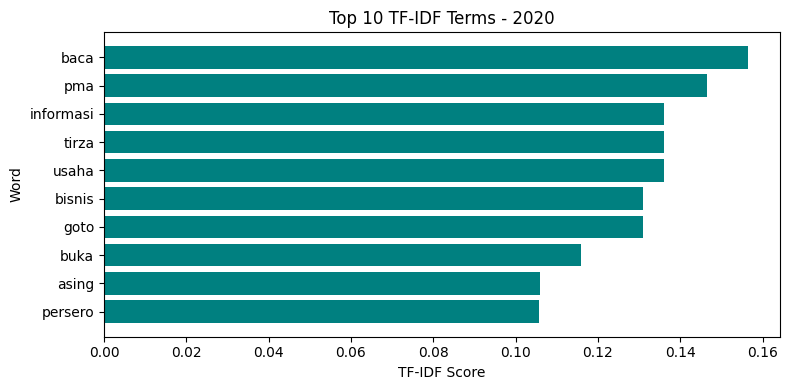


===== 🔸 Top 10 TF-IDF Words untuk Tahun 2021 =====
            term     tfidf
0      pengemudi  0.149009
1           ojol  0.146510
2          kerja  0.145090
3          mitra  0.119812
4         komisi  0.116683
5         persen  0.115945
6         potong  0.111260
7  potong komisi  0.081751
8            ade  0.069686
9           baca  0.068207


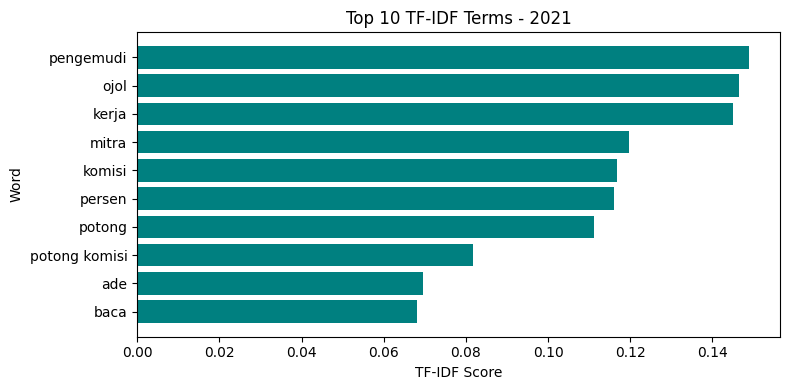


===== 🔸 Top 10 TF-IDF Words untuk Tahun 2022 =====
          term     tfidf
0         naik  0.248265
1         ojol  0.183832
2         ojek  0.160005
3       online  0.160005
4        tarif  0.157987
5  ojek online  0.148932
6       potong  0.140062
7   naik tarif  0.112848
8        usaha  0.109626
9        turun  0.108937


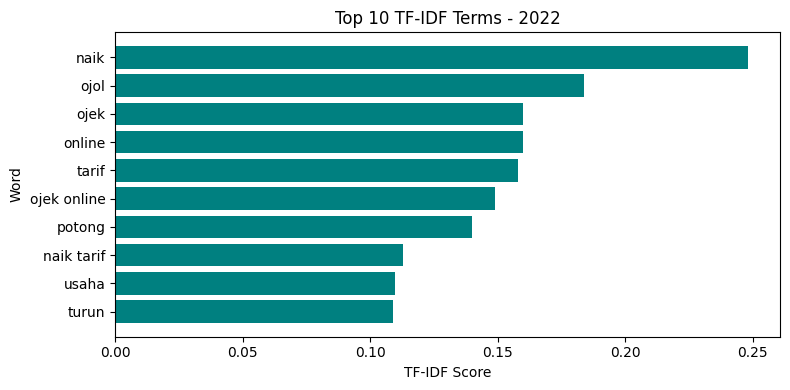


===== 🔸 Top 10 TF-IDF Words untuk Tahun 2023 =====
        term     tfidf
0   aplikasi  0.093177
1      kerja  0.078639
2       guna  0.059226
3       akun  0.056450
4  pengemudi  0.055901
5  perempuan  0.049142
6      tarif  0.049069
7      fitur  0.048333
8      keluh  0.045508
9  pelanggan  0.044134


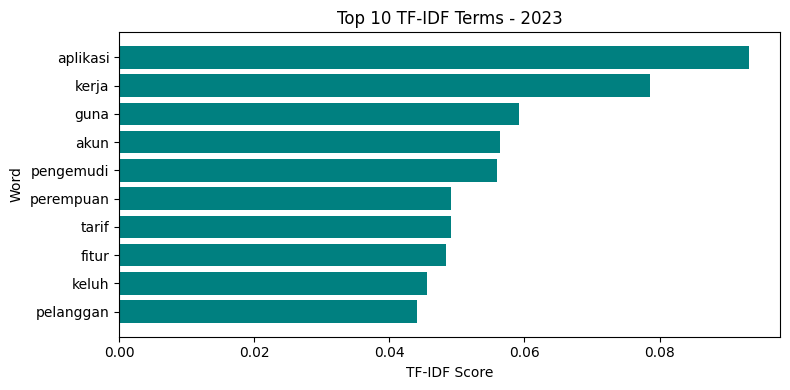


===== 🔸 Top 10 TF-IDF Words untuk Tahun 2024 =====
          term     tfidf
0         ojol  0.067720
1        error  0.061330
2        tarif  0.060803
3       persen  0.058493
4        mitra  0.058317
5         ojek  0.055987
6  ojek online  0.055365
7        keluh  0.054370
8       online  0.054087
9       driver  0.050940


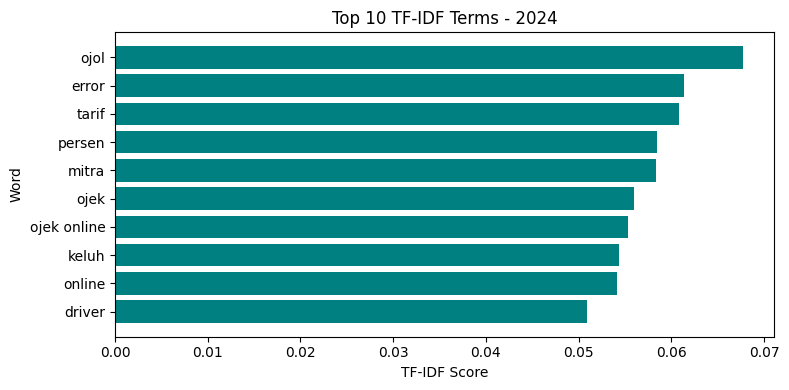


===== 🔸 Top 10 TF-IDF Words untuk Tahun 2025 =====
         term     tfidf
0       tarif  0.156430
1        naik  0.100376
2  naik tarif  0.085049
3        ojol  0.081471
4   pengemudi  0.068820
5      persen  0.063964
6       biaya  0.062865
7    konsumen  0.061255
8       mitra  0.058857
9        ojek  0.052153


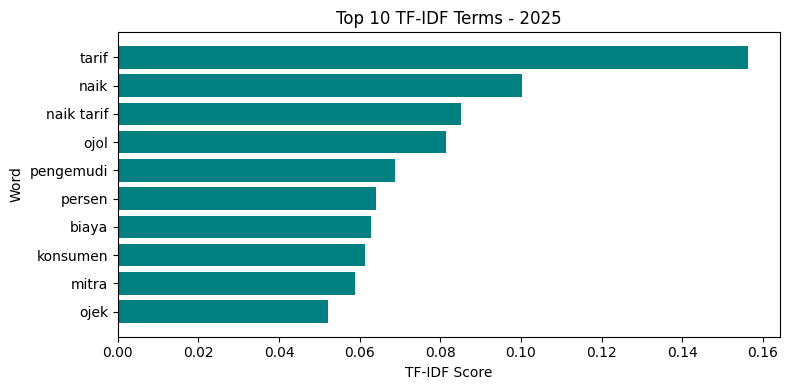


📘 Topik Dominan per Tahun (berdasarkan TF-IDF):


,Year,Topik 1,Topik 2
0,2018,tarif,tampil
1,2020,baca,pma
2,2021,pengemudi,ojol
3,2022,naik,ojol
4,2023,aplikasi,kerja
5,2024,ojol,error
6,2025,tarif,naik


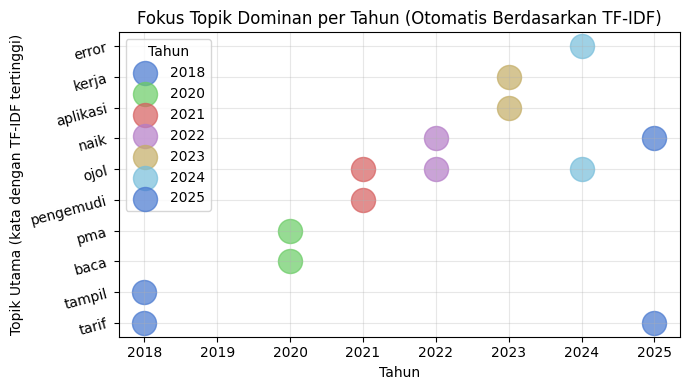

In [6]:
# ============================================================
# 📊 VISUALISASI TOPIK DOMINAN PER TAHUN BERDASARKAN TF-IDF
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Pastikan kolom tanggal & teks valid
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')
df = df.dropna(subset=['stemmed_text', 'tanggal']).reset_index(drop=True)
df['Year'] = df['tanggal'].dt.year

# === Fungsi bantu TF-IDF ===
def compute_tfidf(corpus, max_features=1000, ngram_range=(1,2)):
    vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)
    tfidf_mean = tfidf_df.mean().sort_values(ascending=False)
    result = pd.DataFrame(tfidf_mean).reset_index()
    result.columns = ['term', 'tfidf']
    return result

# === Hitung TF-IDF per tahun & ambil topik utama ===
years = sorted(df['Year'].unique())
summary = {}

for y in years:
    subset = df[df['Year'] == y]
    tfidf_y = compute_tfidf(subset['stemmed_text'].astype(str))

    top_terms = tfidf_y.head(10)
    summary[y] = top_terms['term'].head(2).tolist()  # ambil 2 term teratas

    print(f"\n===== 🔸 Top 10 TF-IDF Words untuk Tahun {y} =====")
    print(top_terms)

    # === Visualisasi per tahun ===
    plt.figure(figsize=(8,4))
    plt.barh(top_terms['term'], top_terms['tfidf'], color='teal')
    plt.gca().invert_yaxis()
    plt.title(f"Top 10 TF-IDF Terms - {y}")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()

# === Buat DataFrame ringkasan topik per tahun ===
summary_df = pd.DataFrame([
    {"Year": year, "Topik 1": terms[0], "Topik 2": terms[1]}
    for year, terms in summary.items()
])

print("\n📘 Topik Dominan per Tahun (berdasarkan TF-IDF):")
display(summary_df)

# === Visualisasi ringkasan topik ===
plt.figure(figsize=(7,4))
for year, topics in summary.items():
    plt.scatter([year]*len(topics), topics, s=300, alpha=0.7, label=str(year))

plt.title("Fokus Topik Dominan per Tahun (Otomatis Berdasarkan TF-IDF)")
plt.xlabel("Tahun")
plt.ylabel("Topik Utama (kata dengan TF-IDF tertinggi)")
plt.yticks(rotation=15)
plt.legend(title="Tahun")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np

# Input: 4 sampel, masing-masing 1 timestep, 1 fitur

jdata = 1

if (jdata==0):
    X = np.array([[[20]], [[25]], [[30]], [[35]]])  # suhu hari ini
    y = np.array([[21], [26], [31], [36]])          # suhu besok adalah +1
else:
    # Misalnya hubungan: y = x + 1
    N = 120
    X = np.arange(0, N, 1)          # 100 data input (0, 1, 2, ..., 99)
    y = X + 1                                # output target (1, 2, 3, ..., 100)

    # RNN butuh input 3D: (samples, timesteps, features)
    X = X.reshape((N, 1, 1))
    y = y.reshape((N, 1))

model = Sequential([
    SimpleRNN(128, activation='tanh', input_shape=(1, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=1000, verbose=0)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()


print("Prediksi untuk input [[40]] :", model.predict(np.array([[[40]]]), verbose=0))


ModuleNotFoundError: No module named 'tensorflow'